# Support Vector Machines

In [1]:
from IPython.display import Image

Support Vector Machine (SVM) is yet another classification algorithm that mostly relies on large margin classification. The optimization in SVM is to maximize the margin.

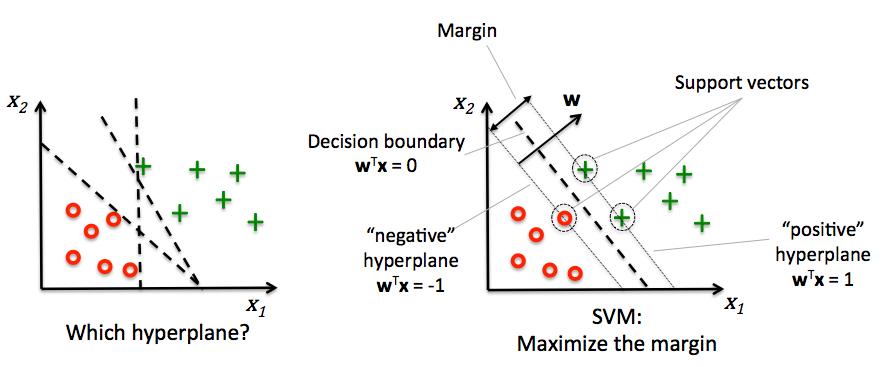

In [2]:
Image('svm-1.png')

To obtain maximum margin intuition let's look at positive and negative hyperplanes.

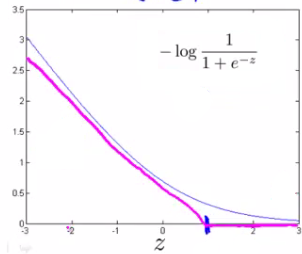

In [3]:
Image('svm-4.png')

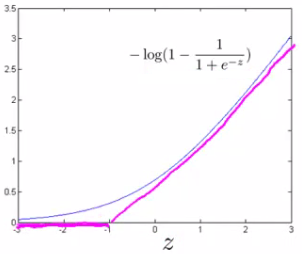

In [4]:
Image('svm-5.png')

Therefore: 

If Y=1, we want $\theta^TX \geq 1$ (not just $\geq 0$) 

If Y=0, we want $\theta^TX \leq -1$ (not just $\geq 0$) 

$$\theta_0+\theta^TX_{pos} = 1$$

$$\theta_0+\theta^TX_{neg} = -1$$

$$ \implies \theta^T(X_{pos}-X_{neg})=2 $$

We can normalize it as:

$$|| \ \theta \ || = \sqrt{\sum_{j=1}^m \theta_j^2} $$

$$ \implies \frac{\theta^T(X_{pos}-X_{neg})}{||\theta||} = \frac{2}{||\theta||}$$

The left side of the preceding equation can then be interpreted as the distance between the positive and negative hyperplane, which is the so-called margin that we want to maximize.

Now the objective function of the SVM becomes the maximization of this margin
by maximizing $\frac{2}{||\theta||}$ under the constraint that the samples are classified correctly,
which can be written as follows:

$$ \theta_0+\theta^Tx^{(i)} \geq 1 \ if \ y^{(i)} =1 $$

$$ \theta_0+\theta^Tx^{(i)} < -1 \ if \ y^{(i)} =-1 $$

These two equations basically say that all negative samples should fall on one side of the negative hyperplane, whereas all the positive samples should fall behind the positive hyperplane. This can also be written more compactly as follows

$$y^{(i)}(\theta_0+\theta^Tx^{(i)}) \geq 1 \ \forall _i$$

## Non-linearly seperable case using slack variable

The motivation for introducing the slack variable $\xi$ was that the linear constraints need to be relaxed for nonlinearly separable data to allow convergence of the optimization in the presence of misclassifications under the appropriate cost penalization

The positive-values slack variable is simply added to the linear constraints:

$$ \theta_0+\theta^Tx^{(i)} \geq 1 \ if \ y^{(i)} = 1-\xi^{(i)} $$

$$ \theta_0+\theta^Tx^{(i)} < -1 \ if \ y^{(i)} = 1+\xi^{(i)} $$

So the new objective to be minimized (subject to the preceding constraints) becomes:

$$\frac{1}{2}||\theta||^2+C\sum_{i}\xi^{(i)}$$

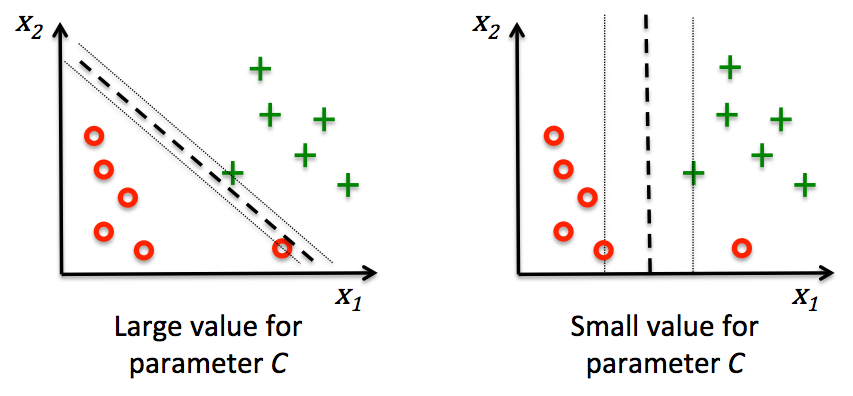

In [5]:
Image('svm-2.png')

In [6]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Let's look at Iris example using SVM:

In [7]:
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split

In [8]:
#Considering only petal-length and petal-width
X = load_iris().data[:,[2,3]]
Y = load_iris().target

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_std = X_scaler.transform(X_train)
X_test_std = X_scaler.transform(X_test)


X_combined_std = np.vstack((X_train_std, X_test_std))
Y_combined = np.hstack((Y_train, Y_test))

Just a plotting function:

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [13]:
from sklearn.svm import SVC

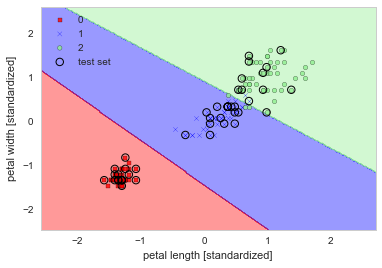

In [14]:
svm = SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std,Y_train)

plot_decision_regions(X_combined_std,Y_combined,classifier=svm,test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.grid(False)
plt.show()

## Non-linear classification with Kernel SVMs

Let's see a non-linear example:

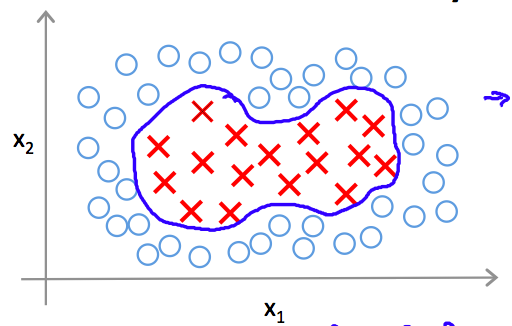

In [15]:
Image('svm-8.png')

This can be solved as follows:

Predict y=1 if
$$\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_1x_2+\theta_4x_1^2+\theta_5x_2^2+...... \geq 0$$
y=0, otherwise

So the above equation can be written as:

$$\theta_0+\theta_1f_1+\theta_2f_2+\theta_3f_3+......$$
$$f_1=x_1,f_2=x_2,f_3=x_1x_2,....$$

In order to compute new features $f_i$ consider below equations

Given $x$:

$$f_1 = similarity(x,l^{(1)}) = exp(-\frac{||x - l^{(1)}||^2}{2\sigma^2})$$
$$f_2 = similarity(x,l^{(2)}) = exp(-\frac{||x - l^{(2)}||^2}{2\sigma^2})$$
$$f_3 = similarity(x,l^{(3)}) = exp(-\frac{||x - l^{(3)}||^2}{2\sigma^2})$$

$similarity$ is nothing but $kernel$ $\implies$ $k(x,l^{(i)})$ 

$$ \gamma = \frac{1}{2\sigma^2} $$

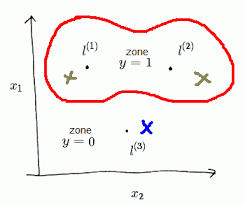

In [16]:
Image('svm-7.png')

### Kernels and Similarity

If $x\approx l^{(i)}$:

$$f_i \approx exp(-\frac{0^2}{2\sigma^2}) \approx 1$$

If $x$ is far from $l^{(i)}$:

$$f_i \approx exp(-\frac{(large \ number)^2}{2\sigma^2}) \approx 0$$

$\therefore$ given $x$, we can extract $n$ features from $x$ with $n$ landmarks as $l^{(1)},l^{(2)},l^{(3)},........,l^{(n)},$ as $f_1,f_2,f_3,........,f_n$

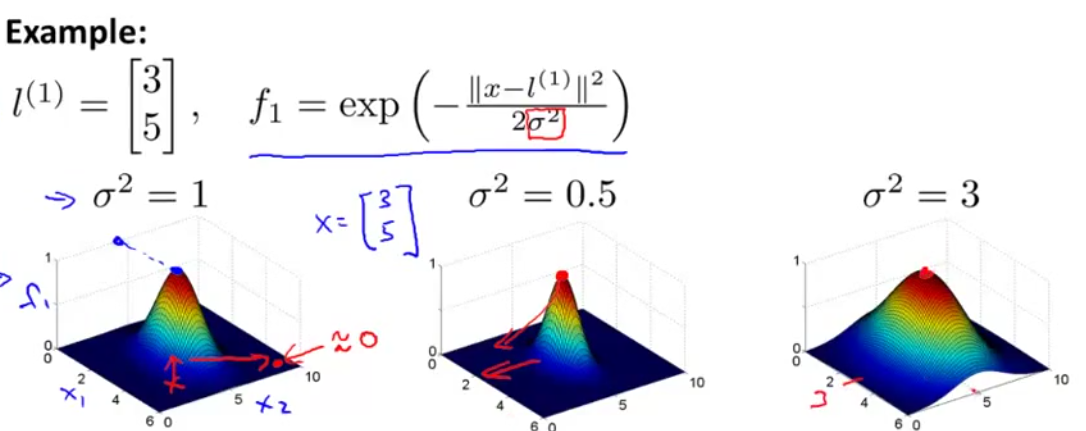

In [17]:
Image('svm-6.png')

$\star$ Landmarks are put exactly at the points as training set examples

### Hypothesis

Given $x$ compute features f $\in \mathbb{R}^{m+1}$

$\implies$ predict $y=1$ if $\theta^Tf \geq 0$

Training

$$min_{\theta} C \sum_{i=1}^m y^{(i)} cost_1(\theta^Tf^{(i)})+(1-y^{(i)}) cost_0(\theta^Tf^{(i)})+\frac{1}{2}\sum_{j=1}^m \theta_j^2 $$

where

$$cost_1(\theta^Tf^{(i)}) = -log (h_\theta(x^{(i)}))$$
$$cost_0(\theta^Tf^{(i)}) = -log (1-h_\theta(x^{(i)}))$$

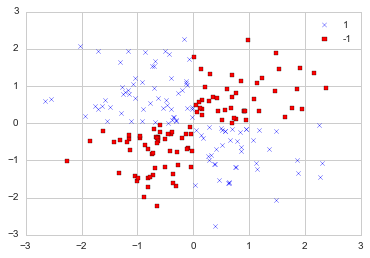

In [18]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')

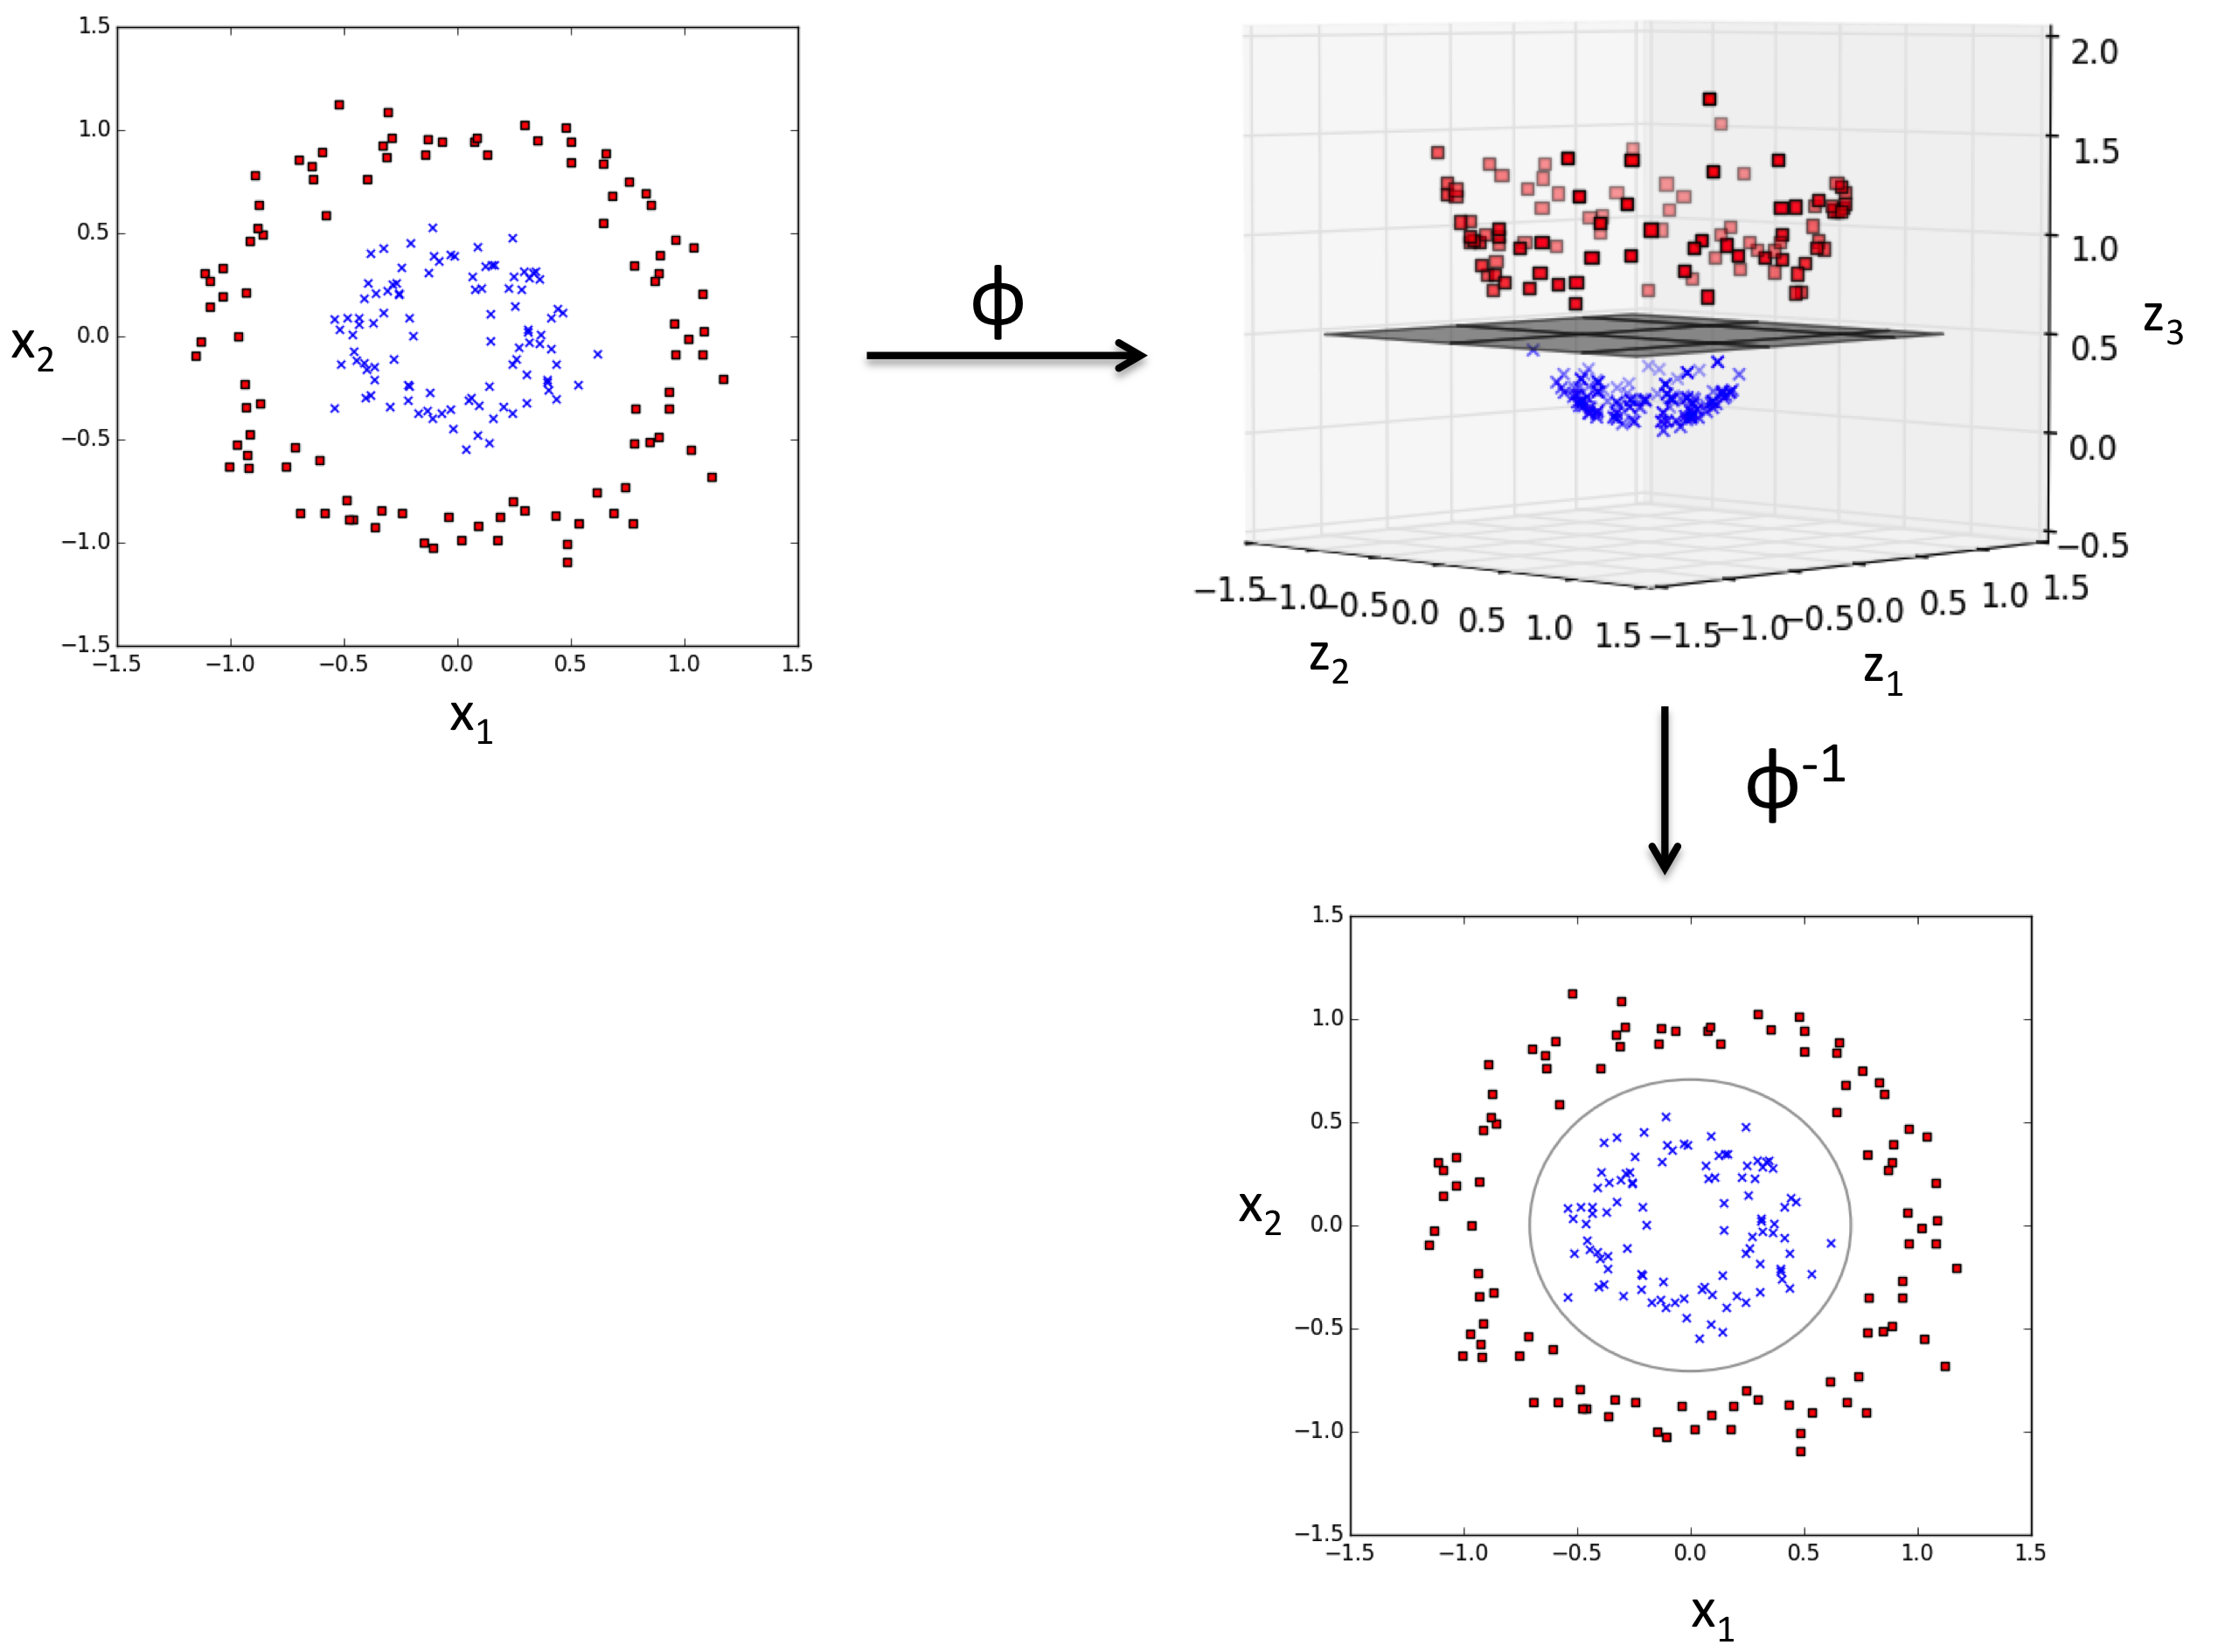

In [19]:
Image('svm-9.png')

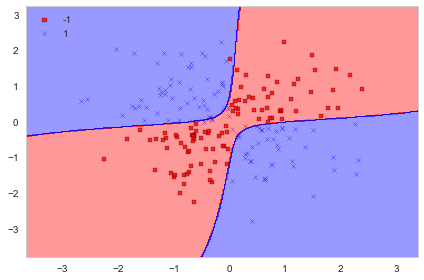

In [20]:
svm = SVC(kernel='rbf',C=10.0,gamma=0.10)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.grid(False)

Now it's time for Iris dataset

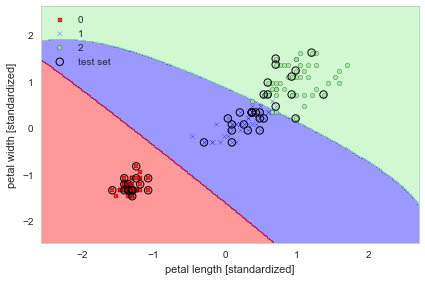

In [21]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, Y_train)

plot_decision_regions(X_combined_std, Y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.grid(False)
plt.show()

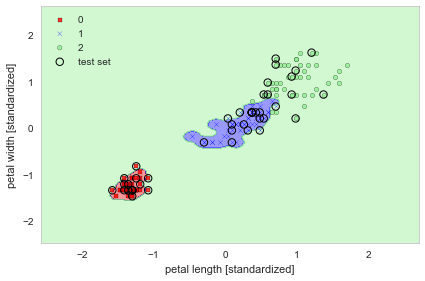

In [22]:
svm = SVC(kernel='rbf', random_state=0, gamma=100, C=1.0)
svm.fit(X_train_std, Y_train)

plot_decision_regions(X_combined_std, Y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.grid(False)
plt.show()

### SVM Parameters

$$C (= \frac{1}{\lambda})$$

Large $C$ $\implies$ Lower Bias, Higher Variance

Small $C$ $\implies$ Higher Bias, Lower Variance

$$\sigma^2 \ or \ \frac {1}{\gamma}$$ 

Large $\sigma^2$ $\implies$  features $f_i$ vary more smoothly $\implies$ Higher Bias, Lower Variance

Small $\sigma^2$ $\implies$  features $f_i$ vary less smoothly $\implies$ Lower Bias, Higher Variance

$$ \gamma \ or \frac{1}{\sigma^2}$$

Large $\gamma$ $\implies$  features $f_i$ vary less smoothly $\implies$ Lower Bias, Higher Variance

Small $\gamma$ $\implies$  features $f_i$ vary more smoothly $\implies$ Higher Bias, Lower Variance